In [2]:
#| echo: false

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# NOTE: you can ignore this code, it's just for data preparation

# Imports the age guessing data from the database,
# restructures it and merges it with the game data.

dt_raw = pd.read_json("https://get-uktfaces-data-suq3dizvtq-uc.a.run.app")
dt = pd.melt(
    dt_raw.reset_index(names="FileId"), 
    id_vars=["FileId"],
    var_name="UserId",
    value_name="Data"
)
dt_mesurements = pd.json_normalize(dt['Data']).rename(columns=lambda x: x[0].upper() + x[1:])
dt = pd.concat([dt.drop(columns=["Data"]), dt_mesurements], axis=1)

game = pd.read_json("https://get-uktfaces-game-suq3dizvtq-uc.a.run.app").rename(columns={"id": "FileId", "age": "Age", "race_f": "Race", "gender": "Gender"})
dt = dt.merge(game, on="FileId", how="left")[["FileId", "UserId", "Guess", "Age", "Race", "Gender", "Position", "TimeStart", "TimeEnd"]].copy()

# Descriptive Statistics

## Introduction

In this section we will learn the basic summaries of data and how to compute them using Python. We will also learn how to visualize data using histograms, box plots, and scatter plots.

## The Arithmetic Mean

The arithmetic mean is a measure of central tendency that is calculated as the sum of the values divided by the number of values. It is the most common measure of central tendency and is often referred to simply as the "average".

For a collection of $n$ values $x_1, x_2, \ldots, x_n$, the arithmetic mean is calculated as:

$$
\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i
$$

Note that this notation is just a short way of writing:

$$
\bar{x} = \frac{x_1 + x_2 + \ldots + x_n}{n}
$$

:::{#ex-mean}
## The Arithmetic Mean


For a collection of three values $n = 3$,  $x_1 = 5$, $x_2 = 4$, and $x_3 = 6$, the arithmetic mean is:

$$
\bar{x} = \frac{5 + 4 + 6}{3} = 5
$$

:::

In [3]:
# What was the average age of the users in the dataset?

# There are multiple ways to calculate the average age of the users in the dataset. We will use two methods: the mean function and the mean method.

## Using the mean method

dt["Age"].mean()

## Using the mean function

np.mean(dt["Age"])


44.94117647058823

In [4]:
# Here we will print the average age and round it to two decimal places

print("The average age of the persons in the images was", dt["Age"].mean().round(2), "years.")

The average age of the persons in the images was 44.94 years.


:::{#ex-mean-2}
## The Average Guess

Calculate the average guess made by the users in the dataset. Print the result rounded to one decimal place.

:::

In [5]:
# Write your code here and run it


## The Range of the Data

Reporting the average of a collection of values is useful, but it only tells a part of the story. We also want to know how different the values in the collection are. One way to measure this is to describe the variation of the data. There are multiple ways to measure the variation of a dataset, here we will start with the percentiles and the range.

- The smallest value in the dataset is called the **minimum** (or the 0th percentile, 0th quartile, or 0th decile).
- The largest value in the dataset is called the **maximum** (or the 100th percentile, 100th quartile, or 100th decile).

- The **range** of the data is the pair of the minimum and the maximum. (Sometime the range is understood as the difference between the maximum and the minimum.)
- The **span** of the data is the difference between the maximum and the minimum.
- The difference between the 75th percentile and the 25th percentile is called the **interquartile range** (IQR).

## The Quartiles

- The **first quartile** (Q1) is the value below which (approx.) 25% of the data fall.
- The **second quartile** (Q2) is the value below which (approx.) 50% of the data fall. The second quartile is also known as the median.
- The **third quartile** (Q3) is the value below which (approx.) 75% of the data fall.

Instead of four parts (quartiles), we can divide the data into ten parts (deciles) or one hundred parts (percentiles) or into any number of parts (quantiles).

- The **first decile** (D1) is the value below which (approx.) 10% of the data fall.
- The **second decile** (D2) is the value below which (approx.) 20% of the data fall.
...
- The **ninth decile** (D9) is the value below which (approx.) 90% of the data fall.

- The **first percentile** (P1) is the value below which (approx.) 1% of the data fall.
- The **second percentile** (P2) is the value below which (approx.) 2% of the data fall.
...
- The **ninetieth percentile** (P90) is the value below which (approx.) 90% of the data fall.
- The **ninety-ninth percentile** (P99) is the value below which (approx.) 99% of the data fall.



In [6]:
# We can compute the quartiles of the guesses of the users in the dataset using the quantile method
# and the numpy quantile function.

print(dt["Guess"].quantile([0.25, 0.5, 0.75]))

np.quantile(dt["Guess"], [0.25, 0.5, 0.75])


0.25    23.00
0.50    43.50
0.75    67.75
Name: Guess, dtype: float64


array([23.  , 43.5 , 67.75])

In [17]:
# A quick way to get an overview of the data is to use the describe method

dt["GuessError"].describe()

count    714.000000
mean       1.665266
std        9.569631
min      -29.000000
25%       -3.000000
50%        1.000000
75%        7.000000
max       60.000000
Name: GuessError, dtype: float64

## The Boxplot

The boxplot is a visualization of the quartiles of a distribution. It shows the minimum and maximum values, the first quartile, the median, and the third quartile. The boxplot is a useful tool for identifying outliers in the data and for comparing the distributions of different datasets.

<Axes: xlabel='GuessError'>

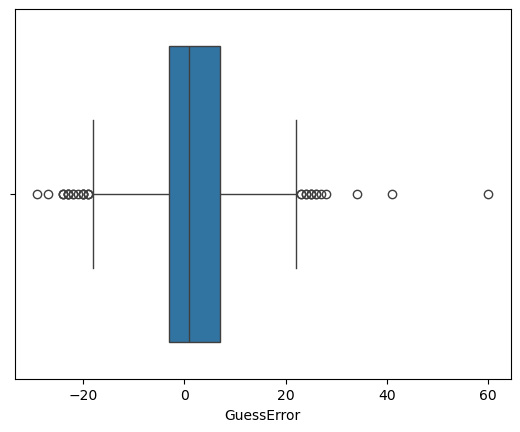

In [18]:
# One way to create a boxplot easily is to use the seaborn library (it is imported as sns at the top of this notebook).

sns.boxplot(data=dt, x="GuessError")

<Axes: xlabel='GuessError', ylabel='Gender'>

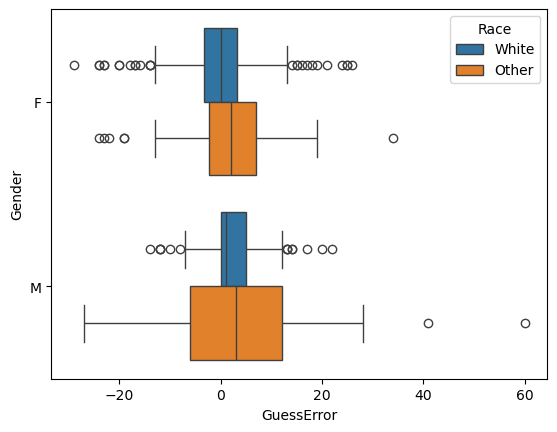

In [19]:
sns.boxplot(data=dt, x="GuessError", y="Gender", hue="Race")

:::{#exr-quantiles}
## The Quartiles and the Boxplot

Create a new column in the dataset `dt` called `GD` (short for guess duration) that shows the duration of each guess in seconds.

- What was the longest guess duration? (Use the `max` method of the new column.)
- What was the shortest guess duration? (Use the `min` method of the new column.)
- What is the average guess duration? (Use the `mean` method of the new column.)
- Use the quantile method of the new column to calculate the first quartile, the median, and the third quartile. Write a short sentence explaining the meaning of these values.

:::

<Axes: xlabel='GD'>

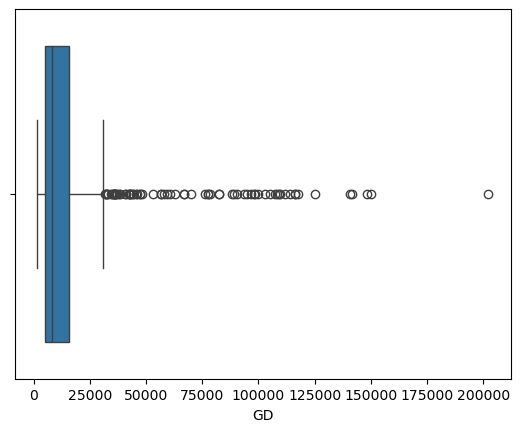

In [51]:
# Write your code here

dt["GD"] = dt["TimeEnd"] - dt["TimeStart"]
dt["GD"].quantile([0.25, 0.5, 0.75])
dt["GD"].describe()

sns.boxplot(data=dt, x="GD")

## The Variance and the Standard Deviation

We have already seen two measures of variation: the span, and the inter-quartile range. 

## The Guess Errors

As we have seen, it is hard to guess the exact age of a person. In our example we happen to know the age of the persons at the time the images were taken and so we can calculate the error of the guesses. The error is the difference between the guess and the actual age. We can calculate the mean error and the median error.

$$
\text{Guess Error} = \text{Guessed Age} - \text{Actual Age}
$$

The guesses are contained in the `Guess` column and the actual ages in the `Age` column. The error is calculated as `Guess - Age`. We will create a new column in the DataFrame called `GuessError` to store the errors.

In [10]:
# Defines a new column "GuessError" in the dataset dt that contains the difference between the guess and the actual age

dt["GuessError"] = dt["Guess"] - dt["Age"]

# Check out the first few rows of the dataset to see the new column

dt[["FileId", "UserId", "Guess", "Age", "GuessError"]].head()

,FileId,UserId,Guess,Age,GuessError
0,72_1_0_20170110141531648_jpg,2TkJQyslSFb5GXbdv1aCc2QAZO53,58,72,-14
1,62_0_0_20170111210223707_jpg,2TkJQyslSFb5GXbdv1aCc2QAZO53,70,62,8
2,75_0_1_20170111205346848_jpg,2TkJQyslSFb5GXbdv1aCc2QAZO53,57,75,-18
3,21_1_2_20170105183505385_jpg,2TkJQyslSFb5GXbdv1aCc2QAZO53,19,21,-2
4,28_0_1_20170112211810813_jpg,2TkJQyslSFb5GXbdv1aCc2QAZO53,30,28,2


Text(0, 0.5, 'Count')

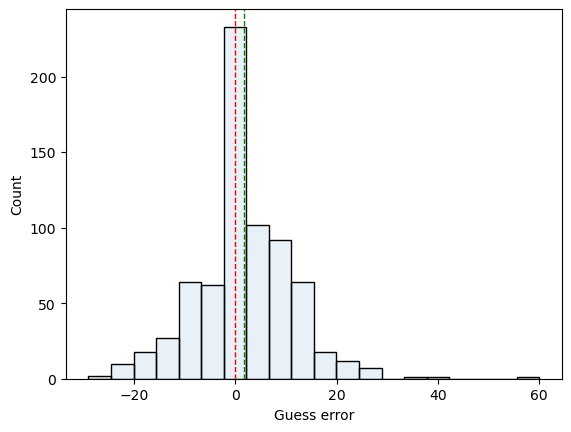

In [14]:
# Plot a histogram of the guess errors
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn histogram

sns.histplot(dt["GuessError"], bins=20, alpha=0.1)

# Draws a vertical line at x=0 (no guess error)
plt.axvline(x=0, color='r', linestyle='--', linewidth=1)
plt.axvline(x=dt["GuessError"].mean(), color='g', linestyle='--', linewidth=1)

plt.xlabel("Guess error")
plt.ylabel("Count")

In [15]:
dt.groupby("Gender")["GuessError"].mean()

Gender
F    0.735119
M    2.492063
Name: GuessError, dtype: float64

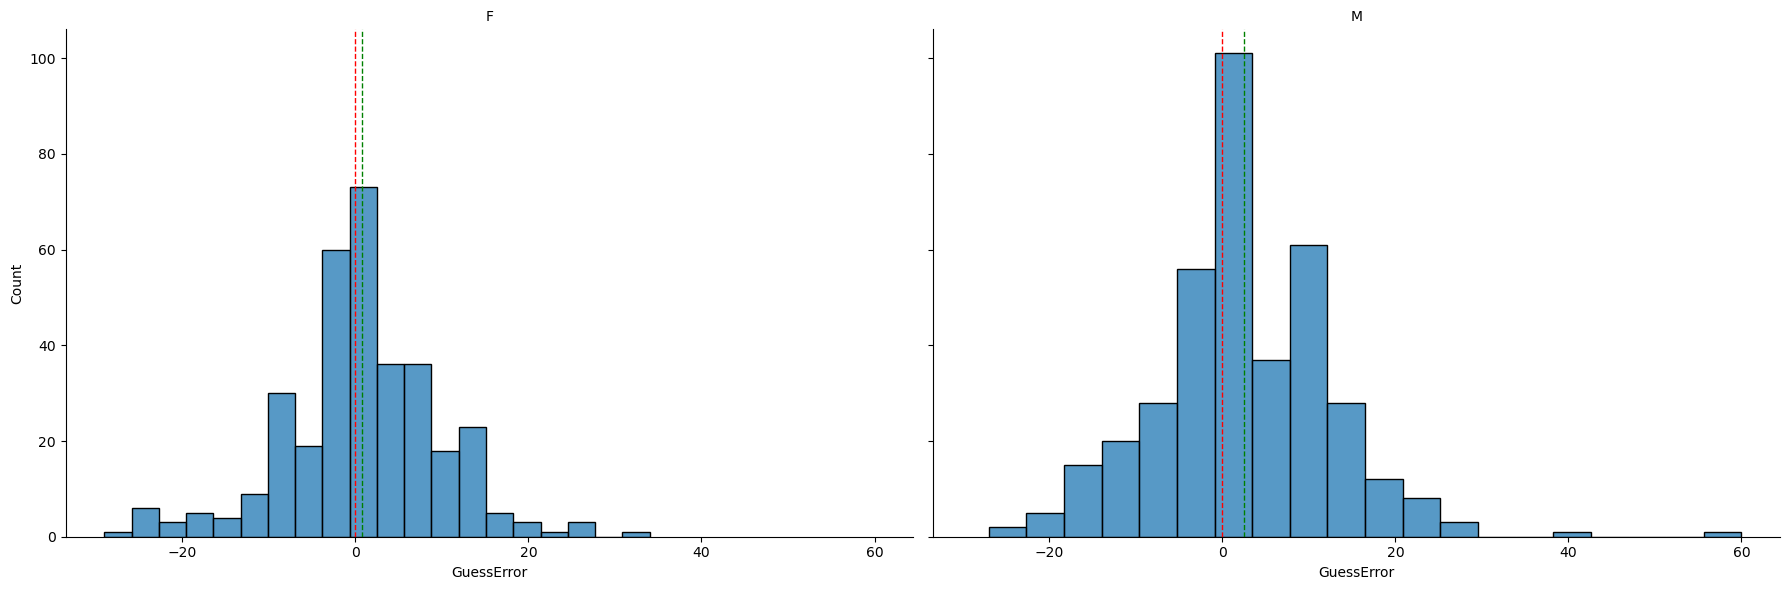

In [ ]:
# NOTE: ignore this code for now, it's just for visualization

# Create a FacetGrid object
g = sns.FacetGrid(dt, col="Gender", height=6, aspect=1.5, )

# Map the sns.histplot function to the grid
g.map(sns.histplot, "GuessError", bins=20)
g.map(plt.axvline, x=0, color='r', linestyle='--', linewidth=1)

def plot_mean(data, **kwargs):
    plt.axvline(x=data.mean(), color='g', linestyle='--', linewidth=1)

g.map(plot_mean, "GuessError")
# Set titles
g.set_titles(col_template="{col_name}")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Now that we have the errors, we can ask questions like:

- What is the average error of the guesses?
- What is the median error of the guesses?
- What is the range of the errors?


In [ ]:
# Exercise: print out three columns for your part of the data (mydata): "Guess", "Age", "GuessError"
# Note: you will have to re-create mydt because we added a new column to the dataset of all users (dt)



In [ ]:
# Exercise: Calculate your average guess error. What problem do you see with this value? Use the np.mean function to calculate your average guess error.



In [ ]:
# Exercise: What were your highest overestimate and highest underestimate? Use the np.max and np.min functions to calculate these values.



In [ ]:
# Exercise: Calculate the median of your guess errors. Use the np.median function to calculate the median of your guess errors.
# What is the meaning of the median in this context?



## Of Variability and Variance

Until now we have discussed the span of the data and the inter-quartile range as measures of variability. Another measure of variability is the variance. The variance is the average of the squared differences between each value and the mean. The (empirical/sample) variance is calculated as:

$$
\text{S}^2_{x} = \frac{1}{n - 1} \sum_{i=1}^{n} (x_i - \bar{x})^2
$$

Closely related to it is the standard deviation, which is the square root of the variance:

$$
\text{S}_{x} = \sqrt{\text{S}^2_{x}}
$$


What are the units of measurement of the variance and the standard deviation?

- Assume that x is measured in meters. What are the units of measurement of the variance and the standard deviation?
- Assume that x is measured in centimeters. What are the units of measurement of the variance and the standard deviation?
- Assume that x is measured in years. What are the units of measurement of the variance and the standard deviation?v

:::{#ex-variance}
## Computing the variance

Given two sets of measurements: $x = (x_1 = 1, x_2 = 8, x_3 = 3)$, $y = (y_1 = 2, y_2 = 7, y_3 = 4)$, calculate the variance and the standard error of each set.

:::


In [ ]:
# To calculate the variances in Python it is convenient to first store the values into variables

x = np.array([1, 8, 3])
y = np.array([2, 7, 4])

print("x= ", x)
print("y= ", y)

x=  [1 8 3]
y=  [2 7 4]


In [ ]:
np.var(x)

8.666666666666666

In [ ]:
np.var(y)

4.222222222222222

In [ ]:
np.std(x)

2.943920288775949

In [ ]:
np.sqrt(np.var(x))

2.0548046676563256

In [ ]:
np.std(y)

2.0548046676563256

In [ ]:
np.sqrt(np.var(y))

2.0548046676563256

In [ ]:
# Exercise: Calculate the standard deviation of your guess errors

:::{#ex-duration}
## Guess Duration

The columns `TimeStart` and `TimeEnd` contain the timestamps (seconds since January 1st 1970) when the user saw the image and when the user submitted the guess. We can calculate the time it took the user to make the guess by subtracting the start time from the end time.

- Create a new column in the DataFrame called `GuessDuration` containing the time it took the user to make the guess in seconds.
- Calculate the average time it took the users to make the guess.
- Calculate the median time it took the users to make the guess.

:::